<img src="logo.jpg" alt="logo" width="150" height="80" style="float: left; margin-right: 10px;">

<br><br><br>

<h1><center>Final Deliverable - Artificial Intellignence (Machine Learning)</center></h1>
<br><br><br>

<center><img src="ai.png" alt="map" width="500" height="400"></center>
<br><br><br>

Delphin Bonheur NGOGA - Nell PATOU PARVEDY - Clément MARQUES - Joel Stephane YANKAM NGUEGUIM


## 1. Introduction
HumanForYou is a pharmaceutical company based in India, employing around 4,000 people. Each year, the company faces a high employee turnover rate of approximately 15%, which causes significant challenges: the projects on which departing employees were working fall behind schedule, damaging the company’s reputation with customers and partners. 
Furthermore, this turnover requires maintaining a large human resources team to recruit, train, and onboard new employees, leading to increased costs and productivity loss.


In this context, management has requested an in-depth analysis of the available data to identify the main factors influencing turnover. The goal is to propose predictive models to guide actions that will motivate employees to stay. This project relies on analyzing several anonymized datasets containing demographic, professional, satisfaction, and performance information about employees.


Alongside technical and operational challenges, adopting an ethical approach is essential. The use of artificial intelligence and predictive analytics in human resources raises sensitive issues related to personal data protection, prevention of discrimination, transparency of models, and preservation of individual autonomy. Respecting these principles is crucial to building trust and ensuring that the solution does not negatively impact employees’ quality of work life or fundamental rights.


## 2. Ethics
This study is therefore part of an approach that combines analytical performance with ethical requirements, particularly aligned with the European Commission’s Assessment List for Trustworthy Artificial Intelligence (ALTAI) recommendations.


### 2.1 Data supplied
The data supplied by HumanForYou comprises several anonymized CSV files, each providing distinct but complementary information for the turnover analysis:

<br><br>
•	General Human Resources Data (general_data.csv)

This file contains key demographic and professional attributes for each employee identified by a unique EmployeeID. Variables include age, attrition status (whether the employee left during 2016), frequency of business travel in 2015, distance from home to the workplace, education level and field, gender, job level, role within the company, marital status, monthly income, previous employer count, salary hikes, contract hours, stock option level, total years of relevant experience, training days in the last year, company seniority, time since last promotion, and years with the current manager. This comprehensive dataset forms the backbone for understanding employee profiles.

<br><br>
•	Latest Manager Assessment (manager_survey_data.csv)

This smaller file contains each employee’s latest evaluation by their manager as of February 2015. It includes ratings for job involvement (from low to very high) and overall performance (from low to beyond expectations). These assessments provide insights into individual engagement and productivity levels as viewed by direct supervisors.

<br><br>
•	Workplace Quality of Life Survey (employee_survey_data.csv)

Collected in June 2015, this survey gathers employee feedback on three dimensions of job satisfaction: satisfaction with the work environment, the job itself, and work-life balance. Each is rated from low to very high (or poor to excellent for work-life balance). Some responses are missing, indicated by "NA," reflecting voluntary participation. This dataset helps capture subjective factors influencing morale and retention.

<br><br>
•	Working Hours Data (in_out_time.zip)

Two files within this archive record employee arrival and departure times daily throughout 2015. This time clock data allows analysis of working patterns and potential correlations between attendance behavior and attrition, offering a fine-grained temporal perspective on employee engagement.
Together, these anonymized datasets provide a multi-dimensional view of employees, combining objective HR data, managerial evaluations, subjective satisfaction measures, and actual attendance records in 2015, and the turnover outcome relates to departures in 2016. This rich data environment enables a thorough exploration of factors impacting turnover at HumanForYou.

<br><br>
### 2.2 Analysis According to ALTAI Ethical Requirements

The approach adopted for this project is grounded in the principles of trustworthy artificial intelligence, as outlined by the European Commission’s Assessment List for Trustworthy Artificial Intelligence (ALTAI). These principles include respect for human autonomy, technical robustness and security, data privacy and governance, transparency, fairness and non-discrimination, societal well-being, and accountability. 

ETHIC pages and explain our choices following seven requirements recommended by the European Commission

<br><br>
### 2.3 Analysis According to ALTAI Ethical Requirements

The tool supports the actionability the key requirements outlined by the Ethics Guidelines for Trustworthy Artificial Intelligence (AI), presented by  the High-Level Expert Group on AI (AI HLEG) presented to the European Commission, in April 2019. The Ethics Guidelines introduced the concept of Trustworthy AI, based on seven key requirements:

-	Human Autonomy and Oversight

-	Technical Robustness and Safety

-	Data Privacy and Governance

-	Transparency

-	Diversity, Non-Discrimination and Fairness

-	Societal and Environmental Well-being

-	Accountability





## 3. Data loading and preparation

### 3.1 Data import

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### 3.2 Loading data

Here we display the first 5 rows of each file:

In [52]:
# Load dataset
general = pd.read_csv('general_data.csv')

# Display the first lines of the dataset
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [53]:
employee = pd.read_csv('employee_survey_data.csv')
employee.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [54]:
manager = pd.read_csv('manager_survey_data.csv')
manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [55]:
intime = pd.read_csv('in_time.csv')
intime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [56]:
outtime = pd.read_csv('out_time.csv')
outtime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


## Data preparation
### 1. handling missing values

In [78]:
# Check for missing values
general.isnull().sum()

# Imput missing values for numerical variables with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Numeric column selection

general_num = general.select_dtypes(include=['Float64', 'int64'])  
imputer.fit(general_num)

# Replace missing values
general_num_imputed = pd.DataFrame(imputer.transform(general_num), columns=general_num.columns)

# Check for missing values
general_num_imputed.isnull().sum()

Age                        0
DistanceFromHome           0
Education                  0
EmployeeCount              0
EmployeeID                 0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
employee.isnull().sum()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

employee_num = employee.select_dtypes(include=['Float64', 'int64'])  
imputer.fit(employee_num)

employee_num_imputed = pd.DataFrame(imputer.transform(employee_num), columns=employee_num.columns)

employee_num_imputed.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [87]:
manager.isnull().sum()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

manager_num = manager.select_dtypes(include=['Float64', 'int64'])  
imputer.fit(manager_num)

manager_num_imputed = pd.DataFrame(imputer.transform(manager_num), columns=manager_num.columns)

manager_num_imputed.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [104]:
# Remove columns with more than 50% missing values
threshold = 0.5
intime_cleaned = intime.loc[:, intime.isnull().mean() < threshold]

print(f"Columns before: {intime.shape[1]}")
print(f"Columns after: {intime_cleaned.shape[1]}")

# Display missing values for remaining columns
print("\nMissing values in remaining columns:")
print(intime_cleaned.isnull().sum())

Columns before: 262
Columns after: 250

Missing values in remaining columns:
Unnamed: 0      0
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
             ... 
2015-12-24    250
2015-12-28    234
2015-12-29    230
2015-12-30    265
2015-12-31    213
Length: 250, dtype: int64


In [108]:
# Remove columns with more than 50% missing values
threshold = 0.5
outtime_cleaned = outtime.loc[:, outtime.isnull().mean() < threshold]

print(f"Columns before: {outtime.shape[1]}")
print(f"Columns after: {outtime_cleaned.shape[1]}")

# Display missing values for remaining columns
print("\nMissing values in remaining columns:")
print(outtime_cleaned.isnull().sum())

Columns before: 262
Columns after: 250

Missing values in remaining columns:
Unnamed: 0      0
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
             ... 
2015-12-24    250
2015-12-28    234
2015-12-29    230
2015-12-30    265
2015-12-31    213
Length: 250, dtype: int64


### 2. Encoding categorical variables

In [112]:
# 1. Select category columns
general_cat = general.select_dtypes(include=[object])

# 2. Initialize Encoder with sparse_output=False 
# (This ensures you get a standard readable array, not a compressed matrix)
# Note: In older scikit-learn versions, use 'sparse=False' instead of 'sparse_output=False'
cat_encoder = OneHotEncoder() 

# 3. Fit and Transform
general_cat_encoded_array = cat_encoder.fit_transform(general_cat).toarray()

# 4. Get the Feature Names (Crucial for interpretation!)
feature_names = cat_encoder.get_feature_names_out(general_cat.columns)

# 5. Create the DataFrame with correct column names
general_cat_encoded = pd.DataFrame(general_cat_encoded_array, columns=feature_names)

# Check encoding result
general_cat_encoded.head() 


,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


### 3. Data normalization


In [115]:
# Standardizing numeric columns
scaler = StandardScaler()
general_num_scaled = pd.DataFrame(scaler.fit_transform(general_num_imputed), columns=general_num_imputed.columns)

# Verification of standardization
general_num_scaled.head()


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1.541369,-0.393938,-0.891688,0.0,-1.731658,-0.961486,1.405136,-0.678464,-1.150554,0.0,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935
1,-0.648668,0.099639,-1.868426,0.0,-1.730873,-0.961486,-0.491661,-1.079486,2.129306,0.0,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520
2,-0.539166,0.963398,1.061787,0.0,-1.730087,1.749610,2.725053,-0.678464,-0.057267,0.0,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873
3,0.117845,-0.887515,2.038524,0.0,-1.729302,0.845911,0.386301,0.123580,-1.150554,0.0,2.589994,0.221606,1.707500,0.161947,1.493867,0.245834
4,-0.539166,0.099639,-1.868426,0.0,-1.728516,-0.961486,-0.884109,0.524602,-0.877232,0.0,1.415991,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520


In [117]:
scaler = StandardScaler()
employee_num_scaled = pd.DataFrame(scaler.fit_transform(employee_num_imputed), columns=employee_num_imputed.columns)

employee_num_scaled.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,-1.731658,0.252200,1.156302,-1.085336
1,-1.730873,0.252200,-0.663899,1.757749
2,-1.730087,-0.665460,-0.663899,-2.506879
3,-1.729302,1.169861,1.156302,0.336206
4,-1.728516,1.169861,-1.573999,0.336206


In [119]:
scaler = StandardScaler()
manager_num_scaled = pd.DataFrame(scaler.fit_transform(manager_num_imputed), columns=manager_num_imputed.columns)

manager_num_scaled.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,-1.731658,0.379672,-0.426230
1,-1.730873,-1.026167,2.346151
2,-1.730087,0.379672,-0.426230
3,-1.729302,-1.026167,-0.426230
4,-1.728516,0.379672,-0.426230


At this point, we loaded and prepared our housing6month.csv dataset for analysis. We have imputed missing values, encoded categorical variables and normalized numerical variables. The data is now ready for the modeling and classification phase.

## Data Exploration and Visualization

### 1. Analyzing descriptive statistics

Before diving into data visualization, let's take a look at descriptive statistics to get an initial idea of variable distributions.

In [ ]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Sold6M
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.883624
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.320683
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000


**Question:** What are the main things you can learn from descriptive statistics? Identify variables that appear to have outliers. Descriptive statistics allow us to summarize the distribution of each variable and identify outliers(total_rooms, total_bedrooms, population et households).

### 2. Visualizing Numerical Variables
We'll start by visualizing the distributions of numerical variables to better understand their behavior.

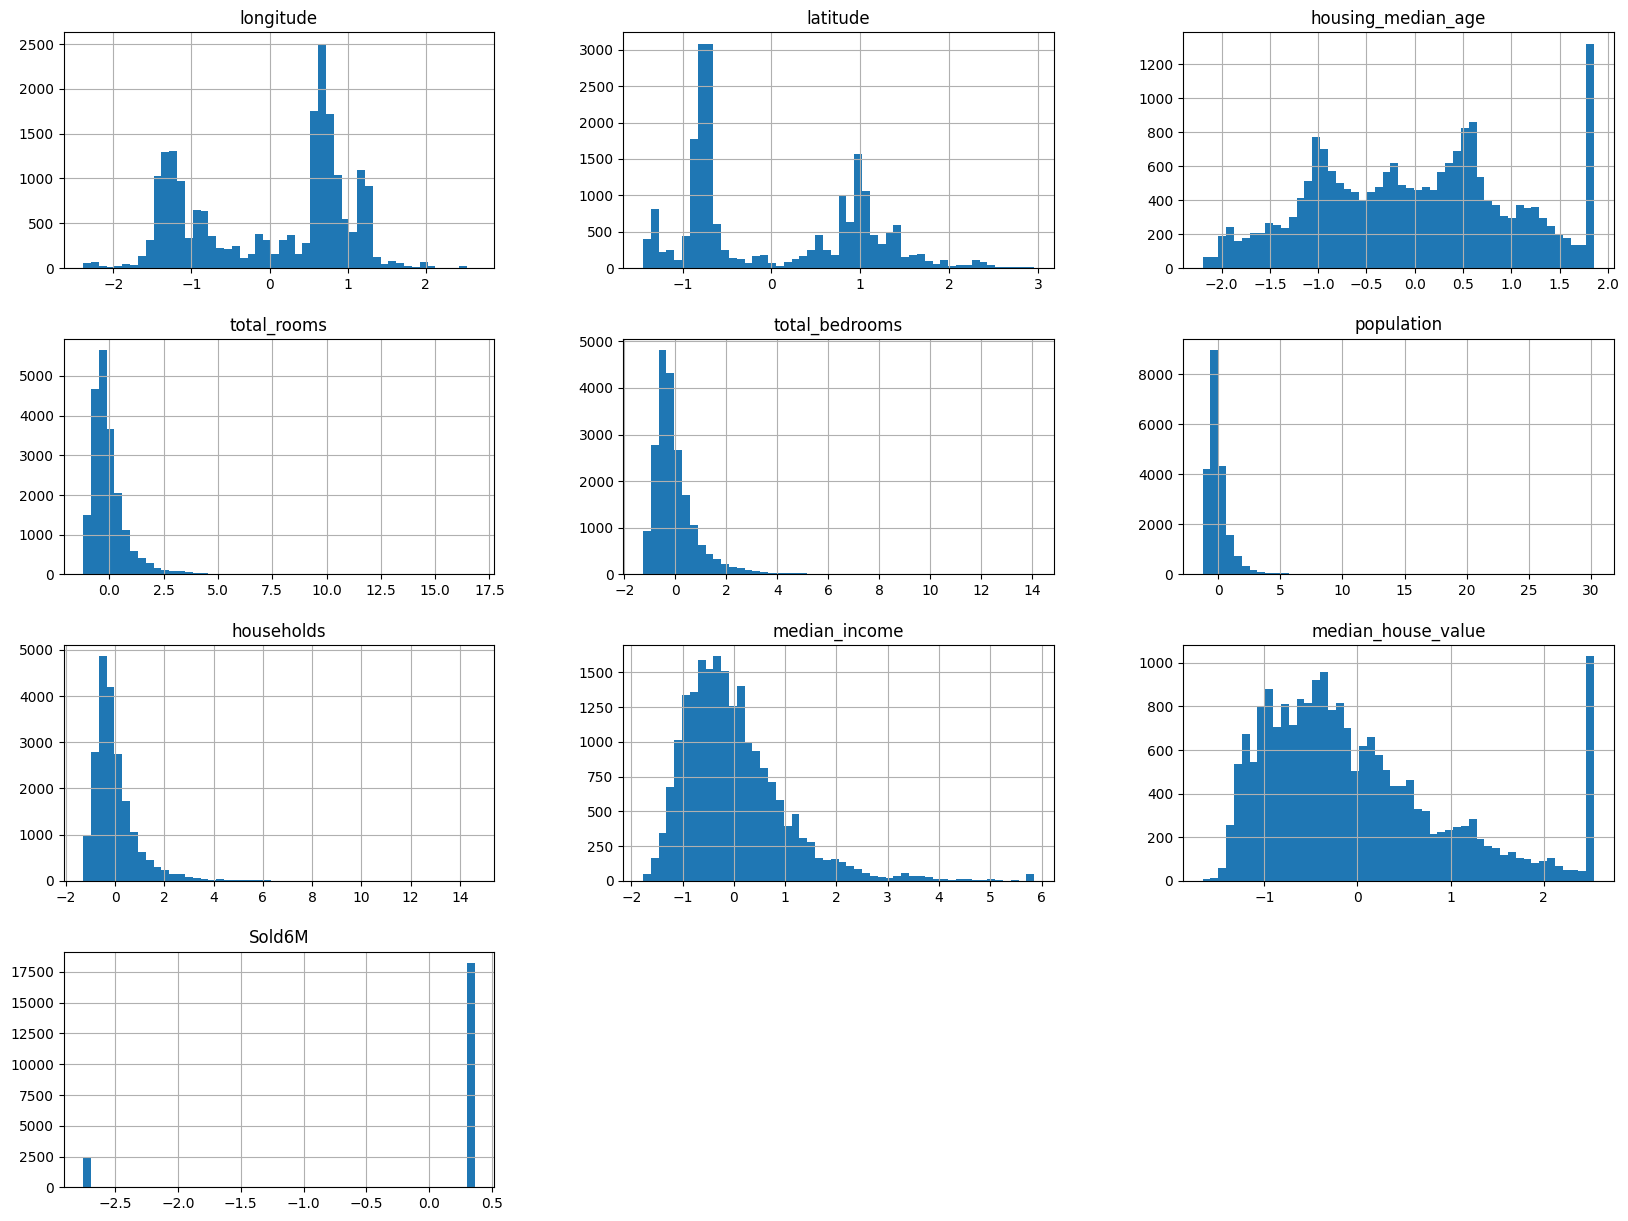

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

housing_num_scaled.hist(bins=50, figsize=(20, 15))
plt.show()


**Question:** What is the distribution of the variable 'median_income'? Are there any variables that show a non-uniform distribution? It is not uniform, and shows a higher density for modest incomes than for high incomes.

### 3. Correlation matrix
To explore the relationships between numerical variables, we use a correlation matrix and a heatmap.

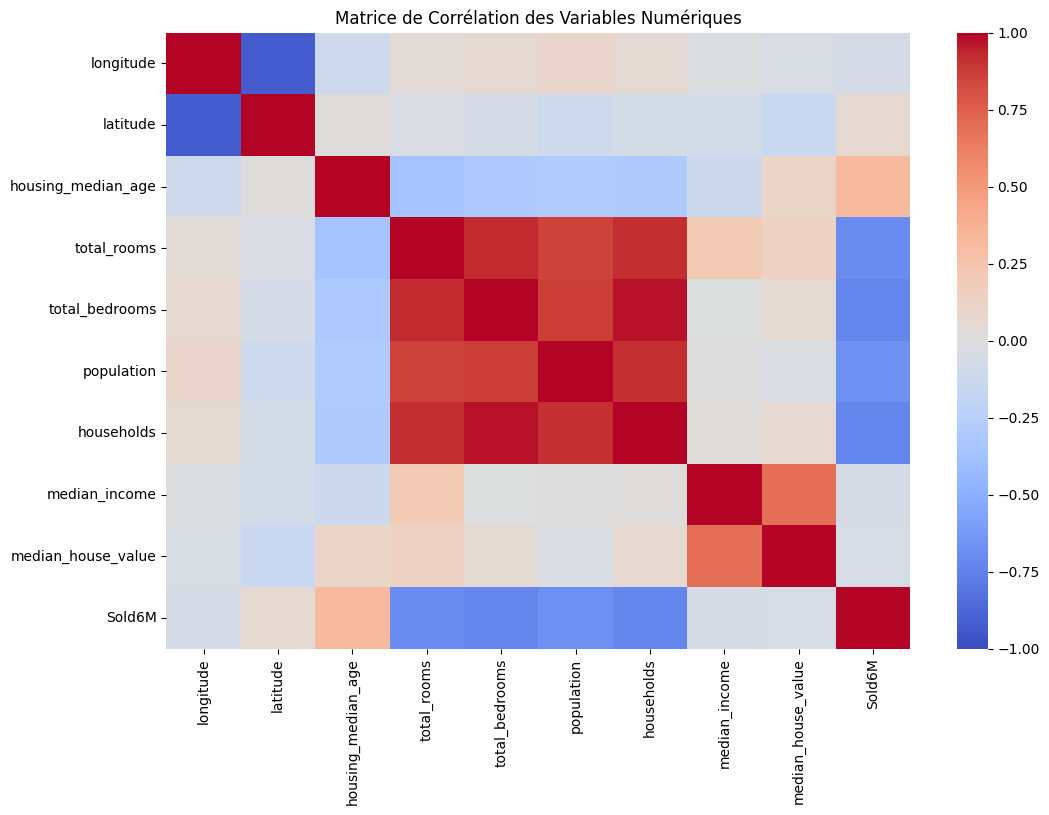

In [ ]:
corr_matrix = housing_num_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()


**Question:** Which variables are most strongly correlated with 'median_house_value'? How can these correlations influence our classification model? median_income is one of the most important variables in the model

### 4. Visualizing relationships between variables

We're going to create a few scatter plots to visualize the relationships between certain key variables.

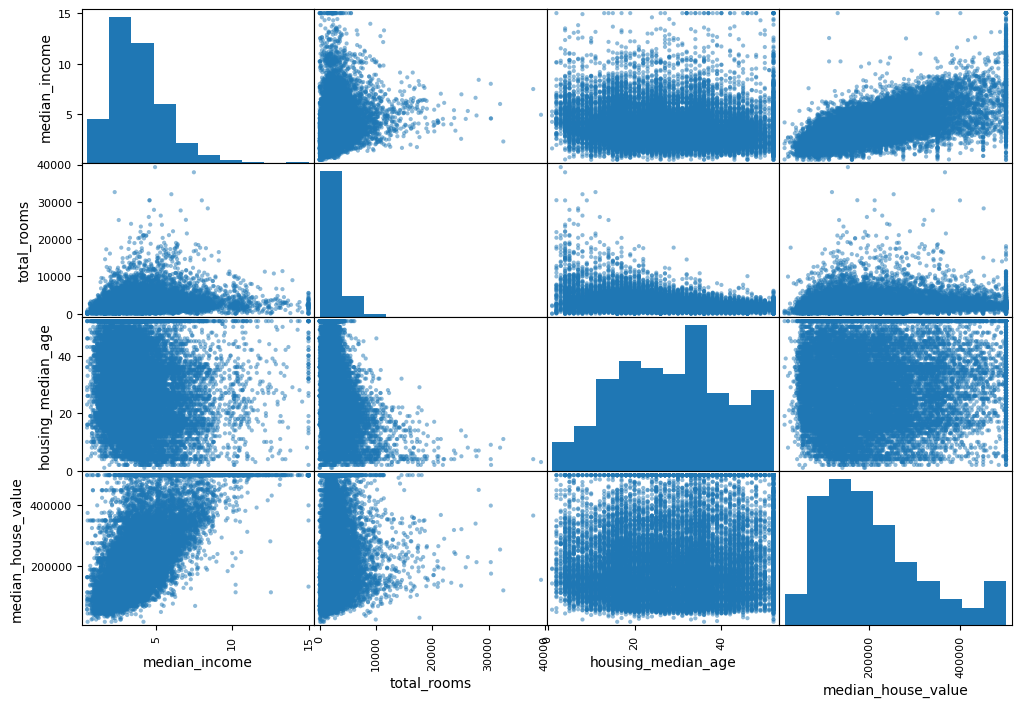

In [ ]:
attributes = ["median_income", "total_rooms", "housing_median_age", "median_house_value"]
scatter_matrix = pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()


**Question:** What specific patterns or relationships can you observe between 'median_income' and 'median_house_value'? Between median_income and median_house_value, we observe an overall upward trend, meaning that wealthier neighborhoods have, on average, more expensive houses. 

### 5. Analysis of the target variable
Let's analyze the Sold6M target variable to see how it's distributed.

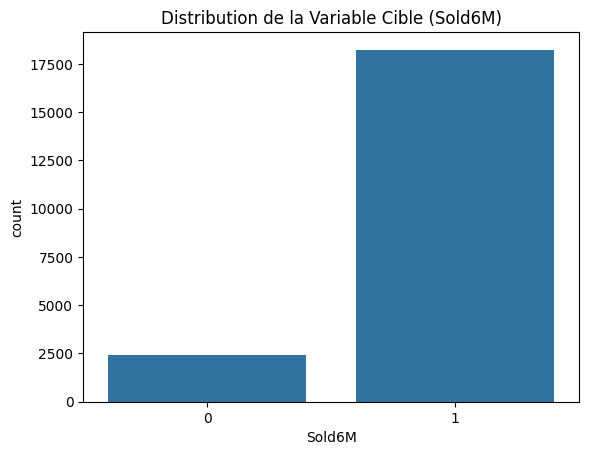

In [ ]:
sns.countplot(x='Sold6M', data=housing)
plt.title('Distribution de la Variable Cible (Sold6M)')
plt.show()


**Question:** Is the distribution of 'Sold6M' balanced? How might this imbalance affect our classification model? The distribution of Sold6M is not balanced: class 1 is very much in the majority, while class 0 represents only a small fraction of the observations. We therefore have a problem of class imbalance. This can cause the classification model to favor the majority class, achieving good overall accuracy while rarely (or never) predicting the minority class. It is therefore necessary to use appropriate strategies: metrics such as F1/recall

### 6. Relationship between Variables and Target
Let's look at how certain variables influence the probability of selling a property within 6 months.

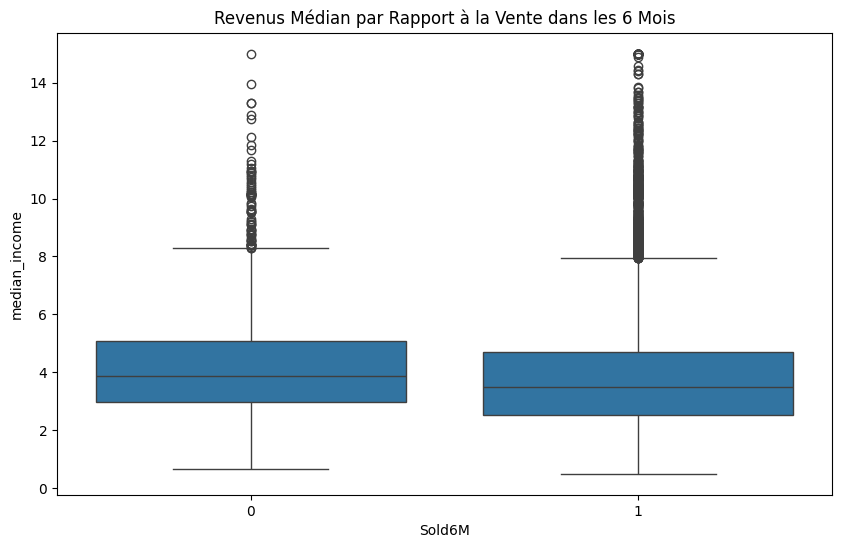

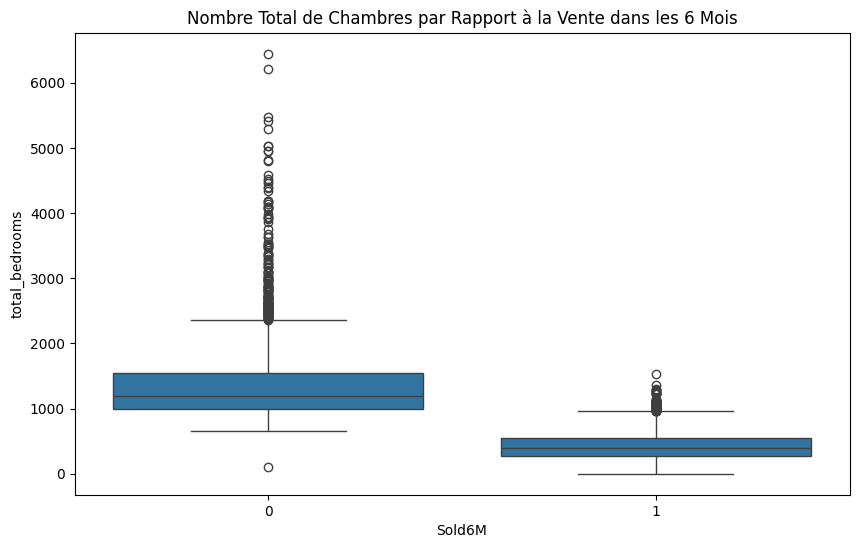

In [ ]:
# Boxplot of median earnings vs. sale within 6 months
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sold6M', y='median_income', data=housing)
plt.title('Revenus Médian par Rapport à la Vente dans les 6 Mois')
plt.show()

# Boxplot of total number of rooms versus sales within 6 months
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sold6M', y='total_bedrooms', data=housing)
plt.title('Nombre Total de Chambres par Rapport à la Vente dans les 6 Mois')
plt.show()


**Question:** What trend do you observe between 'total_bedrooms' and the probability of selling a property within 6 months? How can this inform our model? For total_bedrooms, the boxplot shows that homes sold within 6 months (Sold6M = 1) generally have fewer bedrooms than those not sold, with a lower median and less dispersion.

## Classification models
In this section, we will create and assess several classification models to predict whether a property will be sold within 6 months (Sold6M). We will explore different classification algorithms, measure their performance and compare results using standard metrics.


### Reminder of the main performance metrics

Performance metrics are essential for assessing the effectiveness of classification models. Here's a reminder of the main metrics used:

#### 1. Accuracy
Accuracy is the ratio of the number of correct predictions to the total number of predictions.

$
\text{Precision} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$

#### 2. Precision
Precision is the ratio of true positives (TP) to the sum of true positives (TP) and false positives (FP).

$
\text{Precision} = \frac{VP}{VP + FP}
$

#### 3. Recall
Recall is the ratio of true positives (TP) to the sum of true positives (TP) and false negatives (FN).

$
\text{Recall} = \frac{VP}{VP + FN}
$

#### 4. F1-Score
The F1-score is the harmonic mean of precision and recall, providing a balance between the two.

$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$


### Confusion Matrix

The confusion matrix is a method of visualizing the performance of a classification model. It displays results in tabular form, with actual and predicted predictions. Its components are :

- **True Positives (VP)**: Number of times the positive class was correctly predicted.
- **False Positive (FP)**: Number of times the negative class was incorrectly predicted as positive.
- **True Negatives (VN)**: Number of times the negative class was correctly predicted.
- **False Negatives (FN)**: Number of times the positive class was incorrectly predicted as negative.

$
\begin{array}{|c|c|c|}
\hline
& \text{Predicted Positive} & \text{Predicted Negative} \\
\hline
\text{True Positive} & \text{VP} & \text{FN} \\
\hline
\text{True Negative} & \text{FP} & \text{VN} \\
\hline
\end{array}
$

### AUC and ROC curve

#### ROC curve (Receiver Operating Characteristic)

The ROC curve is a graph showing the performance of a classification model at different discrimination thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

- True Positive Rate (TPR)** : This is the recall.

$
TPR = \frac{VP}{VP + FN}
$

- False Positive Rate (FPR)** : This is the ratio of false positives to the sum of true negatives and false positives.

$
FPR = \frac{FP}{FP + VN}
$

#### AUC (Area Under the Curve)

AUC is the area under the ROC curve. It measures the model's ability to distinguish between positive and negative classes. An AUC of 1.0 indicates a perfect model, while an AUC of 0.5 indicates a model that does no better than random choice.

- **AUC interpretation** :
  - **0.9 - 1** : Excellent performance
  - **0.8 - 0.9** : Good performance
  - **0.7 - 0.8** : Acceptable performance
  - **0.6 - 0.7** : Poor performance
  - **0.5 - 0.6** : Very poor performance

ROC curves and AUC scores are valuable tools for comparing the performance of different classification models, particularly in situations where classes are unbalanced.

By using these metrics and tools, you can comprehensively assess the performance of your classification models and choose the one best suited to your problem.

## Model application

### 0. Preparation of learning and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Logistic regression

### Logistic regression reminder

Logistic regression is a statistical technique used to model the probability of a binary event (with two possible outcomes) occurring. Unlike linear regression, which predicts a continuous value, logistic regression predicts the probability of an event occurring.

#### Mathematical formulation

Logistic regression uses the logistic or sigmoid function to transform the output of linear regression into a probability.

The logistic function is defined as follows:
$\sigma(z) = \frac{1}{1 + e^{-z}}$

In logistic regression, \( z \) is a linear combination of the features:
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Where:
- $\beta_0$ is the intercept (y-intercept)
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the characteristics $x_1, x_2, \ldots, x_n$.

The probability of the event occurring (for example, \( y = 1 \)) is then given by :
$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

#### Cost function

The cost function used to adjust the logistic regression parameters is the log-likelihood, defined as follows:
$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

Where:
- $m$ is the number of samples
- $y^{(i)}$ is the actual value for sample $i$.
- $\hat{y}^{(i)}$ is the predicted probability for sample $i$.

#### Model training

Training the logistic regression model involves finding the $\beta$ parameters that minimize the cost function. This is generally done using the gradient descent algorithm.


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7061    0.773505 -0.796789            0.505394    -0.108071       -0.331056   
14689   1.237697 -1.330521           -0.686477    -0.207541       -0.006769   
17323  -0.284652 -0.487786           -0.368645    -0.474322       -0.607654   
10056  -0.713904  1.698646           -1.163225    -0.836906       -0.920018   
15750  -1.437644  1.001048            1.856182     0.253138        0.408127   
...          ...       ...                 ...          ...             ...   
11284   0.803453 -0.867017            0.505394    -0.598545       -0.800795   
11964   1.067992 -0.754652            0.346478     0.205466        0.079072   
5390    0.593818 -0.749970            0.584852    -0.245128        0.076687   
860    -1.193070  0.912092           -1.083767     0.430534        0.143452   
15795  -1.422670  1.001048            1.856182     0.728944        1.855496   

       population  households  median_income  media

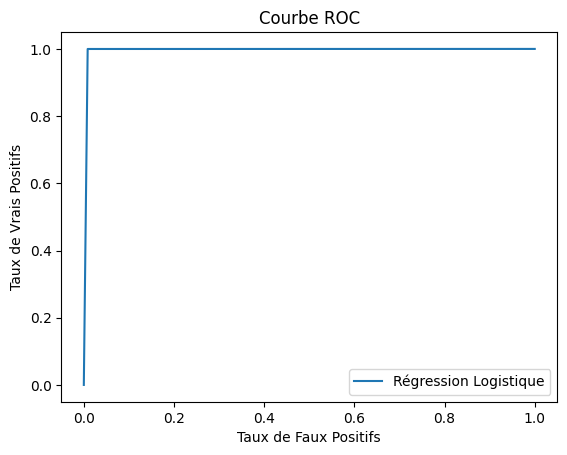

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Model initialization and training

print(X_train)
print(y_train)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)

# Classification report
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)

# AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC (Régression Logistique) :\n", roc_auc_log_reg)

# ROC curve
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label="Régression Logistique")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### 2. Perceptron

### A reminder of the Perceptron

The perceptron is one of the simplest and oldest supervised classification algorithms, introduced by Frank Rosenblatt in 1957. It is an elementary processing unit of a neural network, often used for binary classification tasks. The perceptron is based on a linear combination of input features and uses a threshold function to produce a binary output.

#### Mathematical formulation

The perceptron calculates a weighted sum of the input features and applies a threshold function to determine the predicted class.

The perceptron output is defined as follows:
$\hat{y} = \begin{cases}
1 & \text{si } z \geq 0
0 & \text{si } z < 0
\end{cases} $

Where:
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Here, $\beta_0$ is the bias (or intercept), and $\beta_1, \beta_2, \ldots, \beta_n$ are the feature weights $x_1, x_2, \ldots, x_n$.

#### Learning algorithm

The perceptron's learning algorithm adjusts weights according to classification errors. For each training sample $(x^{(i)}, y^{(i)})$, where $y^{(i)}$ is the actual class:

1. Calculate the predicted output:
$hat{y}^{(i)} = \begin{cases}
1 & \text{si } z \geq 0
0 & \text{si } z < 0
\end{cases}$

2. Update the weights if the prediction is incorrect:
$\beta_j = \beta_j + \eta (y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$
Where $\eta$ is the learning rate.

#### Cost function

The perceptron does not use a cost function in the traditional sense such as logistic regression. Weights are updated directly according to classification errors.


Matrice de Confusion (Perceptron) :
 [[ 682   22]
 [  21 5467]]
Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       704
           1       1.00      1.00      1.00      5488

    accuracy                           0.99      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.99      0.99      0.99      6192

AUC-ROC (Perceptron) :
 0.9824617346938775


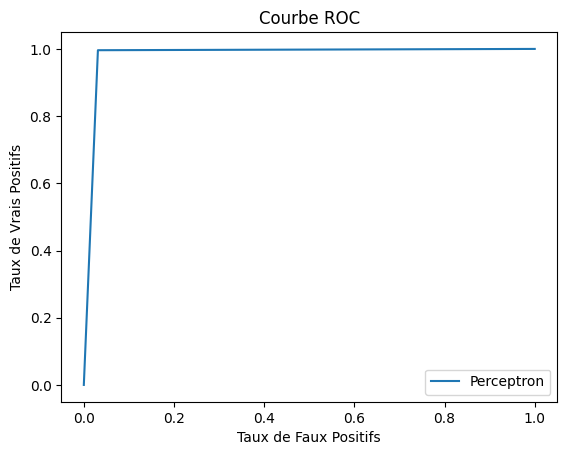

In [ ]:
from sklearn.linear_model import Perceptron

# Model initialization and training

perceptron = Perceptron(random_state=42, max_iter=1000, tol=1e-3)

# Training
perceptron.fit(X_train, y_train)

# Predictions
y_pred_perceptron = perceptron.predict(X_test)

# Confusion matrix
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# Classification report
class_report_perceptron = classification_report(y_test, y_pred_perceptron)
print("Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("AUC-ROC (Perceptron) :\n", roc_auc_perceptron)

# ROC curve
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label="Perceptron")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


**Question:** According to the results obtained, how does Perceptron differ from logistic regression in its approach to classification?

### 3. Support Vector Machine (SVM)

### Support Vector Machine (SVM) reminder

Support Vector Machines (SVM) are supervised classification models used for classification and regression tasks. SVMs seek to find an optimal hyperplane that separates different classes in feature space.

#### Operating principle

SVM works by finding the hyperplane that maximizes the margin of separation between different classes. The margin is defined as the distance between the hyperplane and the nearest data points of each class, called support vectors.

In a binary classification problem, the hyperplane is defined by the equation :

$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = 0$


#### Margin Maximization

The objective of SVM is to maximize the margin, which translates into solving the following optimization problem:

$\text{Minimize} \ \frac{1}{2} \|\beta\|^2$

Under the constraints

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 \ \text{for all} \ i $

#### Cost function and regularization

For non-linearly separable data, SVMs use a method called "soft margin", which allows some misclassification by adding slack variables to the cost function:

$ \text{Minimize} \frac{1}{2} \|\beta|^2 + C \sum_{i=1}^{m} \xi_i $

Under the constraints:

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 - \xi_i $

$\xi_i \geq 0 \ \text{pour tous les} \ i $

Where $ \xi_i $ are the slack variables and $ C $ is a regularization parameter that controls the balance between maximizing margin and minimizing classification errors.

#### Kernels

For non-linear problems, SVMs can use kernel functions (kernels) to transform the data into a higher-dimensional feature space where a linear hyperplane can be found. Commonly used kernels include :
- Linear kernel
- Polynomial kernel
- Basic radial kernel (RBF)
- Sigmoid kernel

#### Advantages and Disadvantages

##### Advantages :
- Efficient in high-dimensional spaces
- Uses a subset of the training points (support vectors) for the decision function, making it memory-efficient
- Flexible thanks to the use of different kernel functions

##### Disadvantages :
- Performance sensitive to choice of hyperparameters and kernel
- Training complexity increases with dataset size
- Interpretation of results less intuitive than for some other models

SVM is a powerful and flexible algorithm for classification tasks, particularly useful in problems where data are not linearly separable.


Matrice de Confusion (SVM) :
 [[ 692   12]
 [   1 5487]]
Rapport de Classification (SVM) :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       704
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      6192
   macro avg       1.00      0.99      0.99      6192
weighted avg       1.00      1.00      1.00      6192

AUC-ROC (SVM) :
 0.9913861648555525


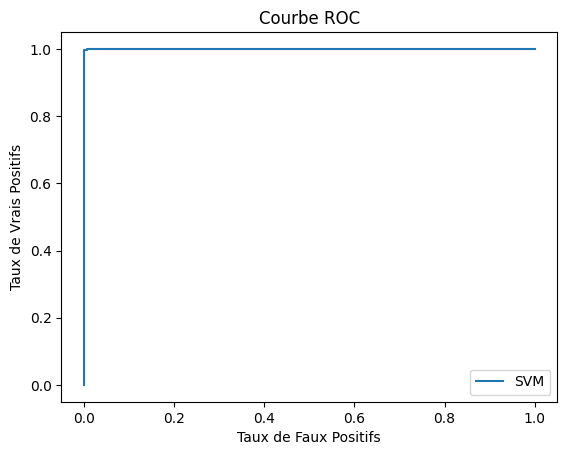

In [ ]:
from sklearn.svm import SVC

# Model initialization and training
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matrice de Confusion (SVM) :\n", conf_matrix_svm)

# Classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Rapport de Classification (SVM) :\n", class_report_svm)

# AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC-ROC (SVM) :\n", roc_auc_svm)

# ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 4. Naive Bayès

### Naive Bayes reminder

Naive Bayes is a family of probabilistic classifiers based on the application of Bayes' theorem with a strong (naive) assumption of independence between features. It is particularly useful for large databases due to its simplicity and computational efficiency.

#### How it works

The Naive Bayes model is based on Bayes' theorem, which calculates the probability of a given class given a set of features. Bayes' theorem is expressed as follows:

$P(C_k | \mathbf{x}) = \frac{P(C_k) \cdot P(\mathbf{x} | C_k)}{P(\mathbf{x})}$$

Where:
- $P(C_k | \mathbf{x})$ is the probability of class $C_k$ given characteristics $\mathbf{x}$.
- $P(C_k)$ is the a priori probability of class $C_k$.
- $ P(\mathbf{x} | C_k) $ is the probability of $\mathbf{x}$ given the class $ C_k $
- $ P(\mathbf{x}) $ is the probability of the set of characteristics $\mathbf{x}$.

#### Independence assumption

Naive Bayes makes the assumption that features are conditionally independent of each other, given the class:

$ P(\mathbf{x} | C_k) = \prod_{i=1}^{n} P(x_i | C_k) $

This assumption considerably simplifies the calculation of probabilities and makes the model very efficient even with a large number of features.

#### Types of Naive Bayes Model

There are several variants of Naive Bayes, depending on the type of data involved:

- **Gaussian Naive Bayes**: Used for continuous features and assumes that features follow a normal (Gaussian) distribution.
- **Multinomial Naive Bayes**: Used for discrete data, such as word counts in natural language processing.
- **Bernoulli Naive Bayes**: Used for binary data.

#### Decision Function

To predict the most likely class for a set of features, Naive Bayes chooses the class $ C_k $ that maximizes $ P(C_k | \mathbf{x}) $. In practice, this means choosing the class that maximizes :

$ P(C_k) \cdot \prod_{i=1}^{n} P(x_i | C_k) $

#### Advantages and Disadvantages

##### Advantages:
- Simple to implement and very quick to train.
- Works well with large data sets.
- Not very sensitive to missing data.
- Powerful for text classification problems and recommender systems.

##### Disadvantages :
- The conditional independence assumption is often unrealistic in real data, which can affect model accuracy.
- Does not take into account interactions between features.
- Predicted probabilities may be less accurate compared to other sophisticated classification models.

Naive Bayes is a robust and efficient classification algorithm, particularly suited to applications where speed and simplicity are essential.


Matrice de Confusion (Naive Bayes) :
 [[ 704    0]
 [ 790 4698]]
Rapport de Classification (Naive Bayes) :
               precision    recall  f1-score   support

           0       0.47      1.00      0.64       704
           1       1.00      0.86      0.92      5488

    accuracy                           0.87      6192
   macro avg       0.74      0.93      0.78      6192
weighted avg       0.94      0.87      0.89      6192

AUC-ROC (Naive Bayes) :
 0.9280247813411079


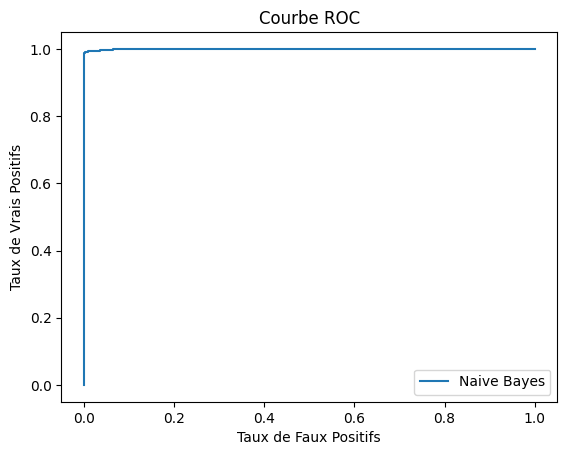

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Model initialization and training
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matrice de Confusion (Naive Bayes) :\n", conf_matrix_nb)

# Classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Rapport de Classification (Naive Bayes) :\n", class_report_nb)

# AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print("AUC-ROC (Naive Bayes) :\n", roc_auc_nb)

# ROC curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 5. Decision Trees

- **Regression**: Prediction of continuous values.
- **Exploratory analysis**: Identification of important features and relationships between features and output classes.

Decision trees are a powerful tool for predictive modeling, offering a combination of simplicity, interpretability and flexibility.
### Reminder of Decision Trees

Decision trees are predictive models that use a tree structure to make decisions based on rules derived from data characteristics. They are widely used for classification and regression tasks due to their simplicity and interpretability.

#### How it works

A decision tree is made up of decision nodes and leaves. Each decision node represents a feature of the data, and each branch of that node represents a value or interval of that feature. The leaves of the tree represent the output classes or regression values.

The model recursively divides the data into subsets based on feature values, creating a tree-like structure. The process continues until all nodes are pure (i.e. contain instances of a single class) or a stopping condition is reached.

#### Building the tree

1. **Feature selection**: At each node, the model selects the feature that best divides the data. This is usually based on criteria such as entropy reduction or Gini index reduction.
2. **Node Creation**: The data is divided into subsets based on the selected feature, and child nodes are created for each division.
3. **Data Distribution**: The data subsets are distributed among the child nodes, and the feature selection process is repeated.
4. **Division stop**: Splitting stops when all nodes are pure or when a predefined stopping condition is reached, such as a maximum tree depth or a minimum number of instances per node.

#### Selection criteria

- **Entropy and Information Gain** : Entropy measures disorder in the data. Information gain is the reduction in entropy after splitting the data.
- **Gini index**: Measures the impurity of the data. A value of 0 indicates maximum purity, while a value of 1 indicates maximum impurity.

#### Advantages and Disadvantages

##### Advantages :
- **Interpretability** : Decision trees are easy to visualize and interpret.
- **No data pre-processing**: Can handle numerical and categorical data without the need for pre-processing.
- **Missing Data Handling**: Can handle missing values using mechanisms such as decision path weighting.
- **Robustness**: Can capture non-linear interactions between features.

##### Disadvantages :
- **Overlearning**: Decision trees can easily overlearn training data, especially when deep.
- **High variance**: Sensitive to variations in training data. Minor changes can result in completely different trees.
- **Bias**: Tends to favor features with many distinct values.

#### Applications

- **Classification**: Assign classes to instances based on their characteristics.


Matrice de Confusion (Decision Tree) :
 [[ 646   58]
 [  44 5444]]
Rapport de Classification (Decision Tree) :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       704
           1       0.99      0.99      0.99      5488

    accuracy                           0.98      6192
   macro avg       0.96      0.95      0.96      6192
weighted avg       0.98      0.98      0.98      6192

AUC-ROC (Decision Tree) :
 0.954798071826133


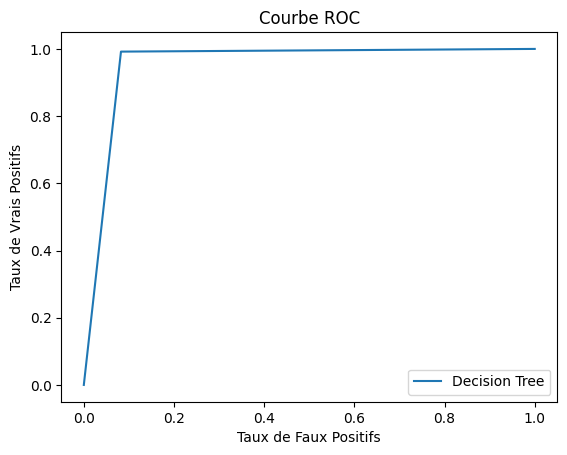

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model initialization and training
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Decision Tree) :\n", conf_matrix_tree)

# Classification report
class_report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de Classification (Decision Tree) :\n", class_report_tree)

# AUC-ROC
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print("AUC-ROC (Decision Tree) :\n", roc_auc_tree)

# ROC curve
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


**Questions:**
Try changing depth parameter values
- What are the advantages and disadvantages of using decision trees for classification?
- How does decision tree depth influence model performance?
- What techniques can be used to avoid overlearning in decision trees?

### 6. Random Forest

### Reminder of Random Forests

Random Forests are a powerful and flexible ensemble method used for classification and regression tasks. They combine several decision trees to improve predictive performance and reduce the risk of overlearning.

#### How it works

A random forest is made up of many independent decision trees, each built on a random sample of the training data and using a random subset of the features for each division of the tree. The predictions of all the trees are then combined to produce a single final prediction.

#### Random Forest construction

1. **Bootstrap sampling**: For each tree in the forest, a random sample with bootstrap replacement of the training data is created. This means that some examples may be selected several times, while others may not be selected at all.
2. **Feature Subset Selection**: At each node of each tree, a random subset of the features is selected. The tree selects the best division from this subset of features.
3. **Tree construction**: Decision trees are built to completion without pruning. This allows each tree to capture complex patterns in the data.
4. **Aggregation of Predictions**: For classification, each tree votes for a class, and the class with the most votes is chosen as the final prediction (majority voting). For regression, the average of all tree predictions is used.

#### Advantages and Disadvantages

##### Advantages :
- **Reduces overlearning**: By combining the predictions of several trees, random forests reduce the risk of overlearning compared with individual decision trees.
- **Robustness**: Insensitive to variations in training data. Random forests are less sensitive to fluctuations in training data.
- **Feature Management**: Able to manage a large number of features and determine the most important ones.
- **Missing Data Handling**: Can handle missing values by imputing values based on forest trees.

##### Disadvantages :
- **Complexity and Computing Time** : Random forests require more computation time and memory than individual decision trees, especially when the number of trees is high.
- **Interpretability**: Less interpretable than individual decision trees, due to the combination of many trees.

#### Applications

- **Classification**: Used for classification tasks in diverse fields such as finance, medicine and marketing.
- **Regression**: Prediction of continuous values in contexts such as real estate price forecasting and sales prediction.
- **Feature Selection**: Identification of the most important features for prediction.

Random forests are a powerful tool for improving the predictive performance and robustness of decision models, by combining the strength of multiple decision trees while mitigating their individual weaknesses.


Matrice de Confusion (Random Forest) :
 [[ 678   26]
 [  20 5468]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       704
           1       1.00      1.00      1.00      5488

    accuracy                           0.99      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.99      0.99      0.99      6192

AUC-ROC (Random Forest) :
 0.9797119334746884


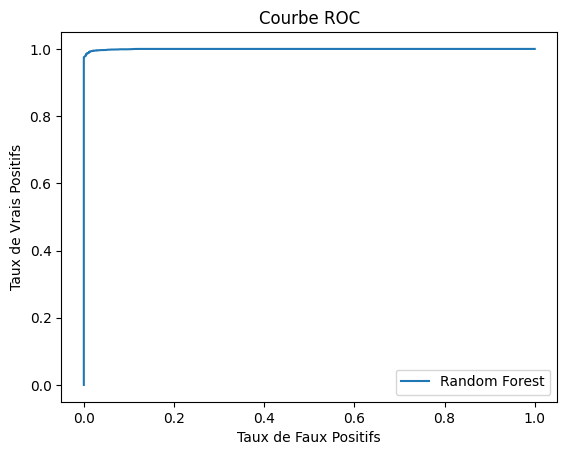

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model initialization and training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# ROC curve
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


**Questions:**

- How does the Random Forest model reduce the risk of overlearning compared with a single decision tree?
- What parameters can be adjusted to improve the performance of a Random Forest?
- Why is it advantageous to use several trees in a Random Forest for classification?

# Comparative study of SK-Learn models

## 1. Preparation of learning and test data



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 2. Training and prediction

In [ ]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Training and prediction
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


## Model Validation
### 1 Confusion Matrix and Key Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Function for displaying results
def display_metrics(y_test, y_pred, model_name):
    print(f"\n{'='*60}")
    print(f"Résultats pour le modèle : {model_name}")
    print(f"{'='*60}\n")
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matrice de Confusion :")
    print(conf_matrix)
    print()
    
    # Classification report
    print("Rapport de Classification :")
    print(classification_report(y_test, y_pred))
    
    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"AUC-ROC : {roc_auc:.4f}\n")
    
    return conf_matrix, roc_auc

# Dictionary to store results
results = {}

# Metric calculation
for name, y_pred in predictions.items():
    conf_matrix, roc_auc = display_metrics(y_test, y_pred, name)
    results[name] = {
        'confusion_matrix': conf_matrix, 
        'roc_auc': roc_auc
    }

# Optional: Display summary comparison
print("\n" + "="*60)
print("COMPARAISON DES MODÈLES - AUC-ROC")
print("="*60)
for name, metrics in sorted(results.items(), key=lambda x: x[1]['roc_auc'], reverse=True):
    print(f"{name:20s} : {metrics['roc_auc']:.4f}")


Résultats pour le modèle : Perceptron

Matrice de Confusion :
[[ 702    2]
 [  23 5465]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       704
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      6192
   macro avg       0.98      1.00      0.99      6192
weighted avg       1.00      1.00      1.00      6192

AUC-ROC : 0.9965


Résultats pour le modèle : LogisticRegression

Matrice de Confusion :
[[ 698    6]
 [   1 5487]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       704
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      6192
   macro avg       1.00      1.00      1.00      6192
weighted avg       1.00      1.00      1.00      6192

AUC-ROC : 0.9956


Résultats pour le modèle : SVM

Matrice de Confusion :
[[ 692  

## 2. Confusion matrix display

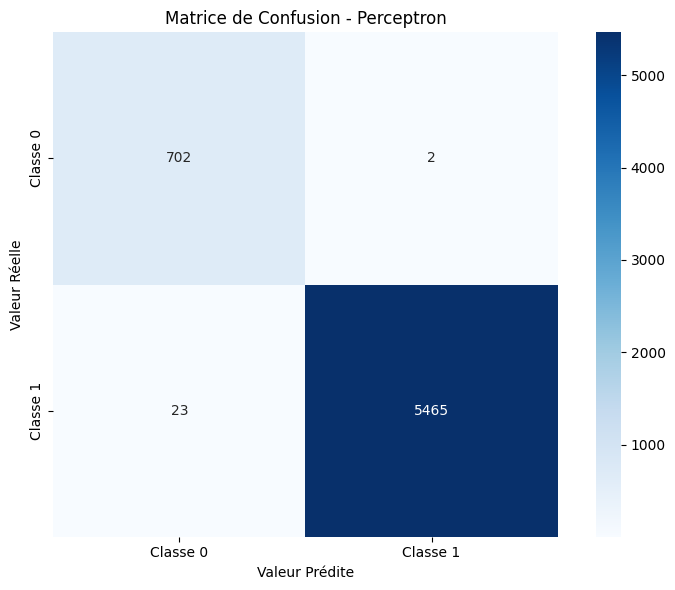

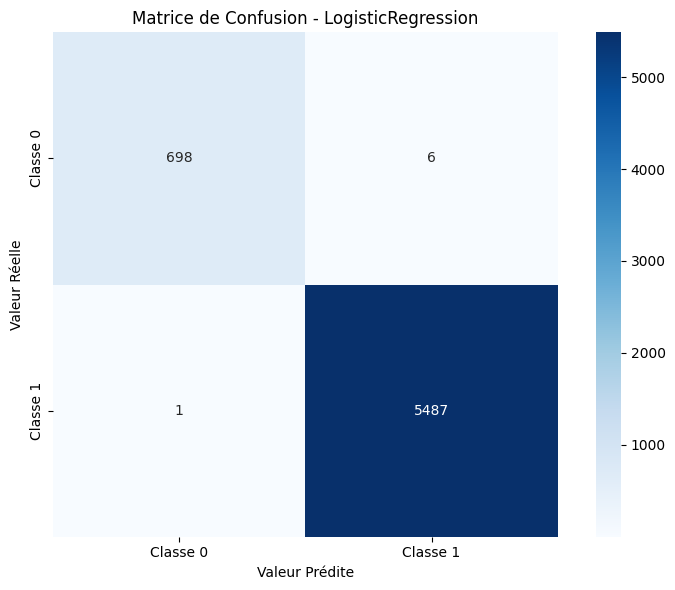

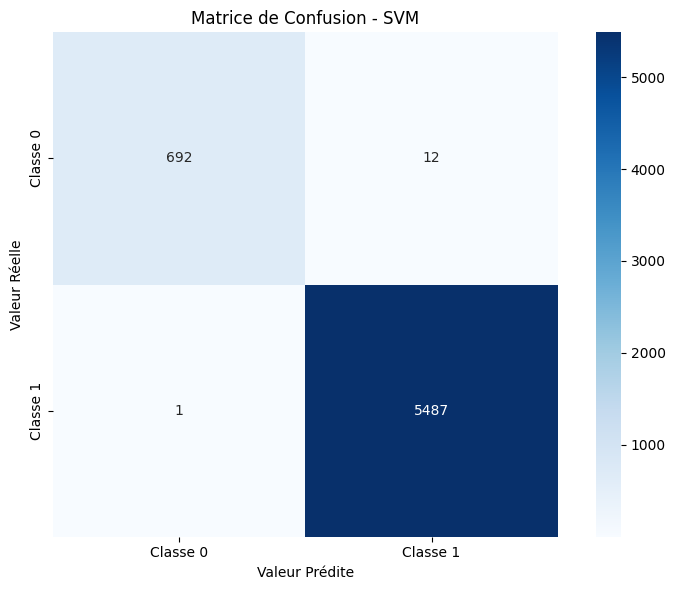

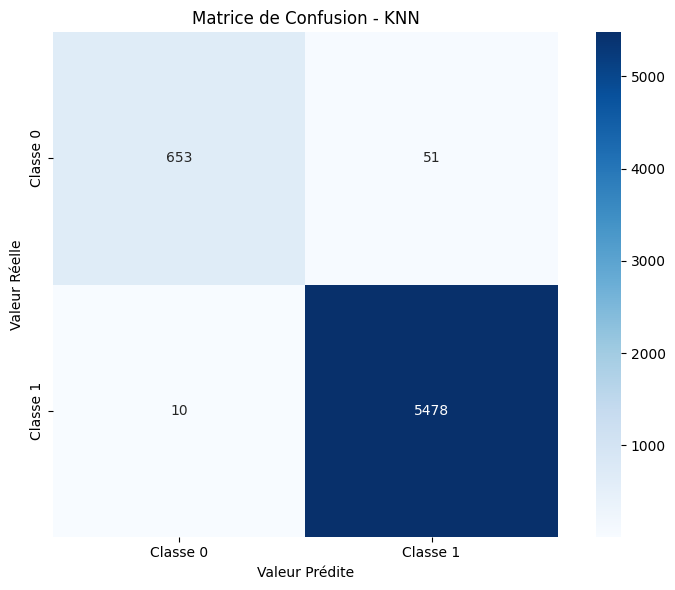

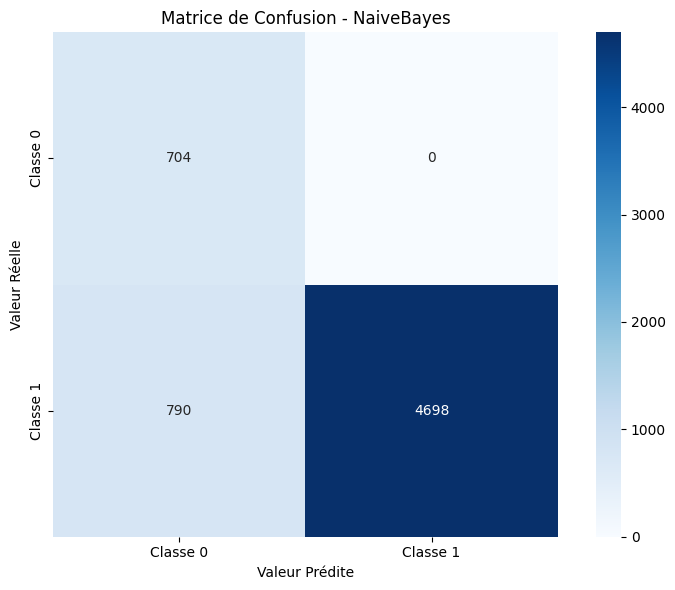

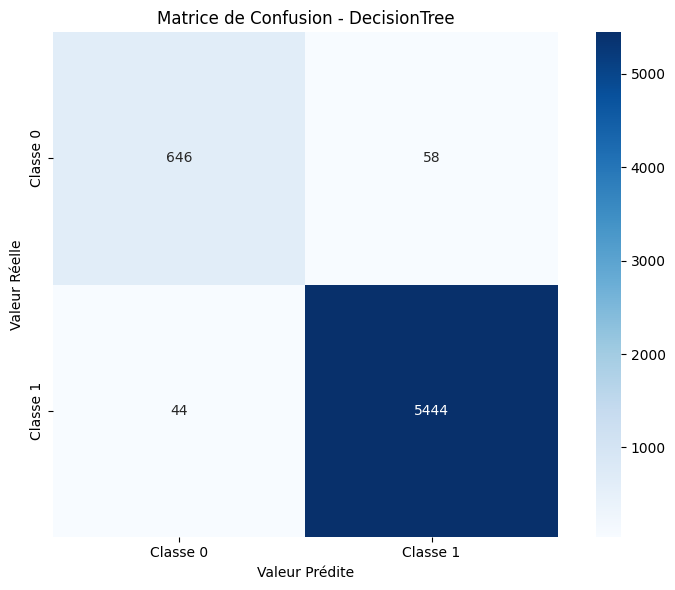

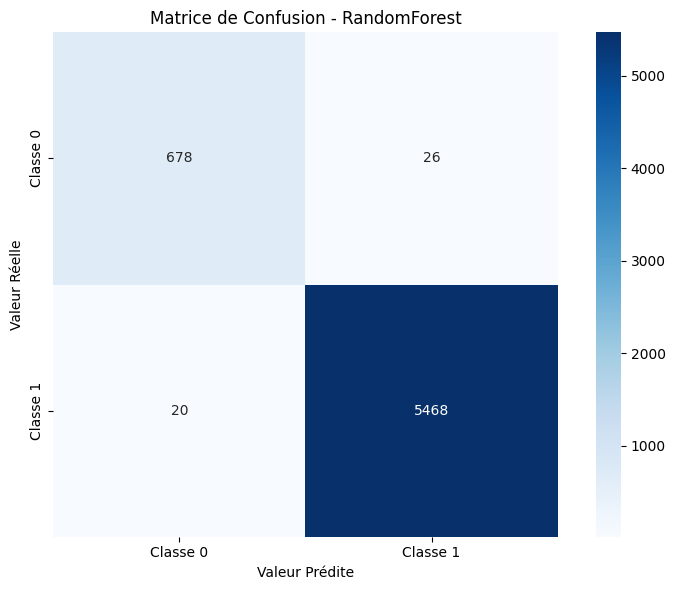

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

for name, y_pred in predictions.items():
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Create figure
    plt.figure(figsize=(8, 6))
    
    # Display heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                cbar=True, square=True,
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    
    plt.title(f'Matrice de Confusion - {name}')
    plt.ylabel('Valeur Réelle')
    plt.xlabel('Valeur Prédite')
    plt.tight_layout()
    plt.show()

## 3. Display of Precision and Recall values and ROC curve

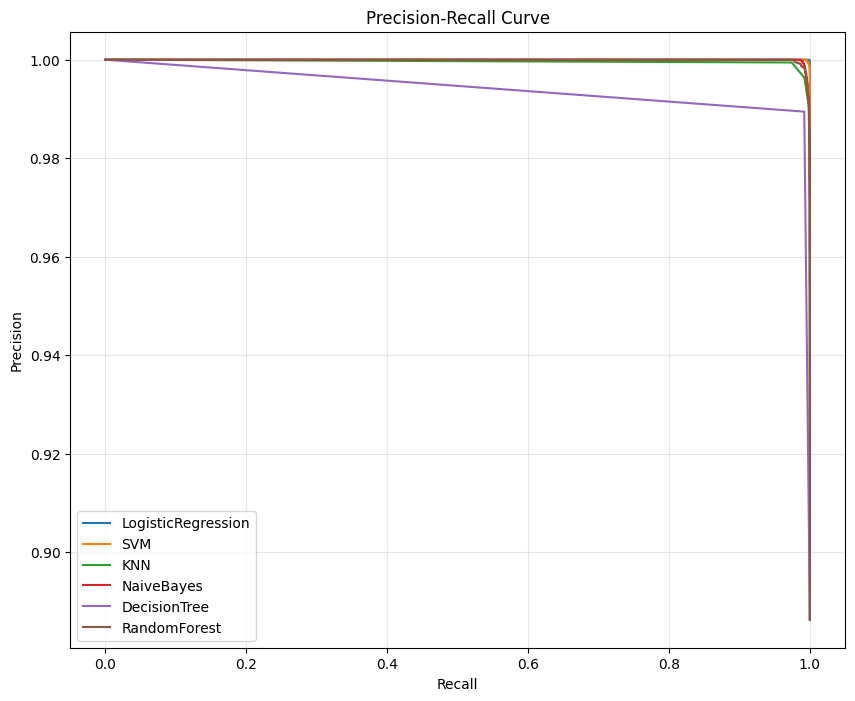

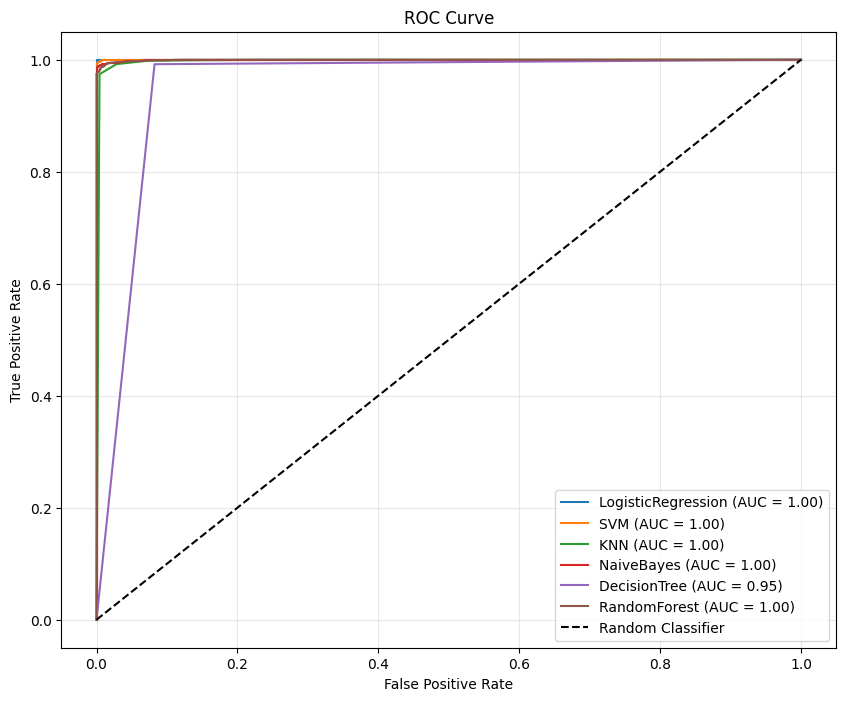

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Drawing Precision-Recall curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Drawing ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. Calculate statistics to compare


TABLEAU RÉCAPITULATIF DES PERFORMANCES
             Model  Precision   Recall  F1 Score
        Perceptron   0.996069 0.995963  0.995988
LogisticRegression   0.998869 0.998870  0.998868
               SVM   0.997902 0.997901  0.997893
               KNN   0.990110 0.990149  0.990019
        NaiveBayes   0.939880 0.872416  0.890396
      DecisionTree   0.983407 0.983527  0.983455
      RandomForest   0.992548 0.992571  0.992557


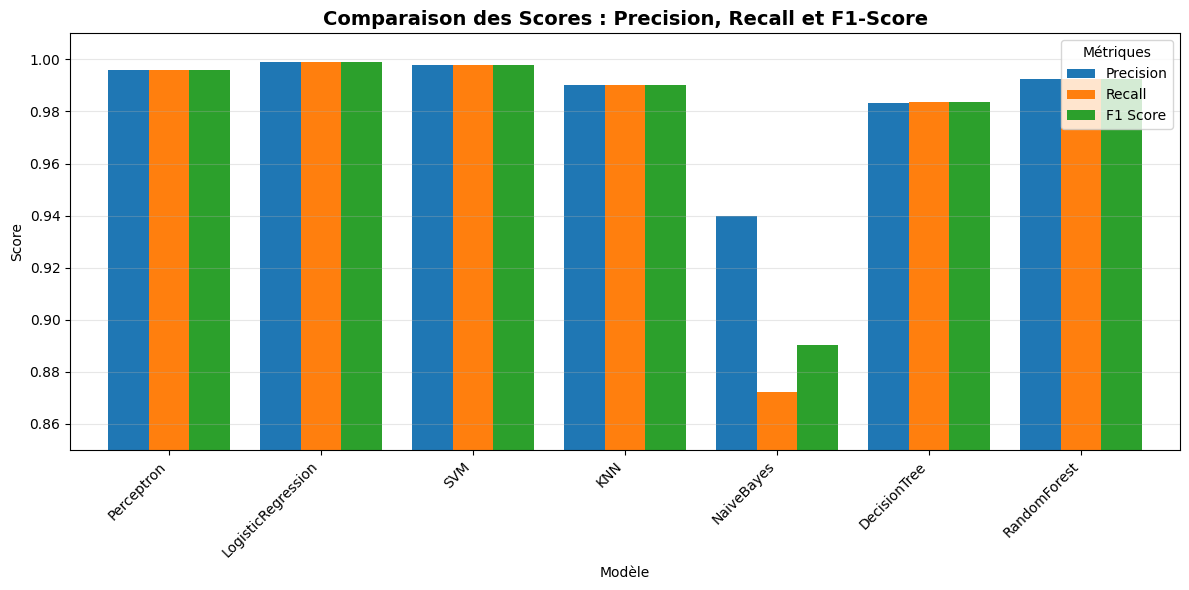

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

precision_scores = []
recall_scores = []
f1_scores = []
model_names = []

for name, y_pred in predictions.items():
    # Calcul des métriques
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Ajout aux listes
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    model_names.append(name)

# Création du DataFrame
score_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Affichage du tableau
print("\n" + "="*70)
print("TABLEAU RÉCAPITULATIF DES PERFORMANCES")
print("="*70)
print(score_df.to_string(index=False))
print("="*70)

# Visualisation avec bar chart (plus adapté qu'un boxplot pour comparer les modèles)
score_df.set_index('Model')[['Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', 
    figsize=(12, 6),
    width=0.8
)
plt.title("Comparaison des Scores : Precision, Recall et F1-Score", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.xlabel("Modèle")
plt.ylim(0.85, 1.01)  # Zoom sur la zone d'intérêt
plt.xticks(rotation=45, ha='right')
plt.legend(title='Métriques')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Put everything in table form

In [ ]:
from sklearn.metrics import roc_auc_score

scores = []

for name, y_pred in predictions.items():
    y_proba = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    scores.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc_score
    })

scores_df = pd.DataFrame(scores)
print(scores_df)


                Model  Precision    Recall  F1 Score       AUC
0          Perceptron   0.999634  0.995809  0.997718       NaN
1  LogisticRegression   0.998908  0.999818  0.999363  0.999996
2                 SVM   0.997818  0.999818  0.998817  0.999963
3                 KNN   0.990776  0.998178  0.994463  0.996982
4          NaiveBayes   1.000000  0.856050  0.922443  0.999498
5        DecisionTree   0.989458  0.991983  0.990719  0.954798
6        RandomForest   0.995268  0.996356  0.995811  0.999539



TEMPS D'ENTRAÎNEMENT ET DE PRÉDICTION
             Model  Training Time (s)  Prediction Time (s)
        Perceptron           0.067109             0.005522
LogisticRegression           0.075238             0.003108
               SVM           7.937387             0.882759
               KNN           0.114836             1.463544
        NaiveBayes           0.016644             0.004954
      DecisionTree           0.196431             0.005007
      RandomForest           3.570392             0.074980


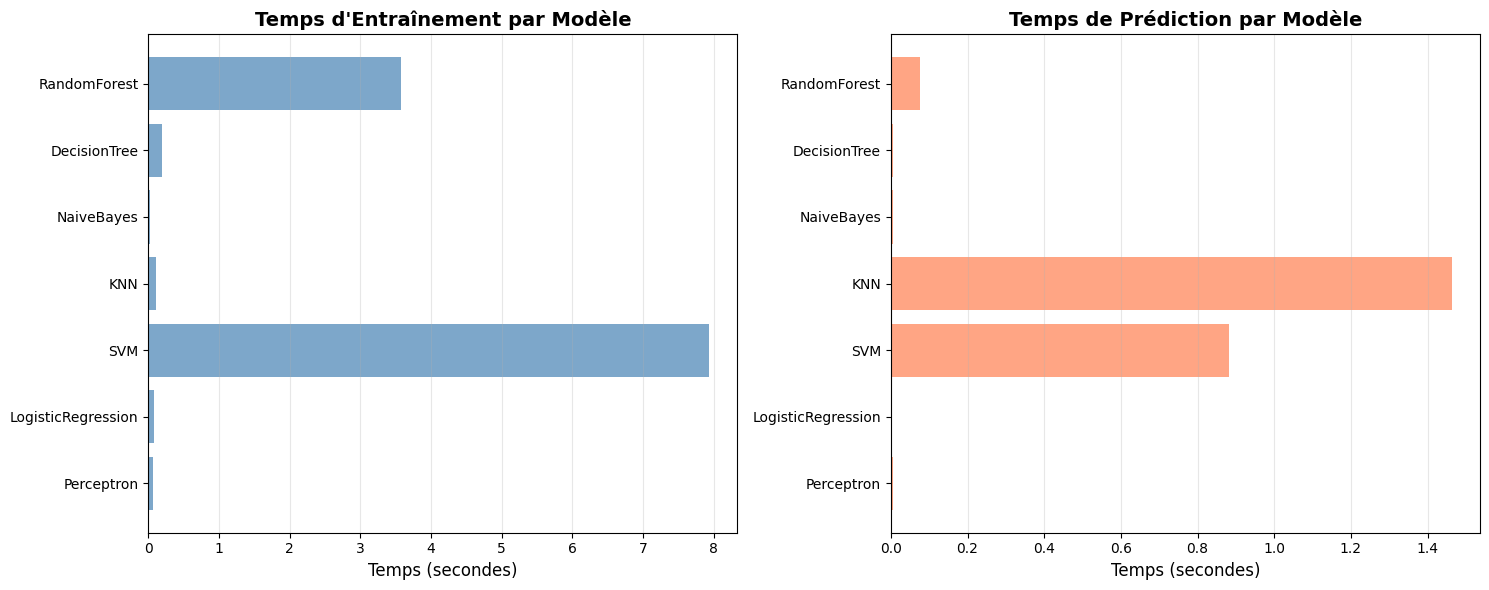

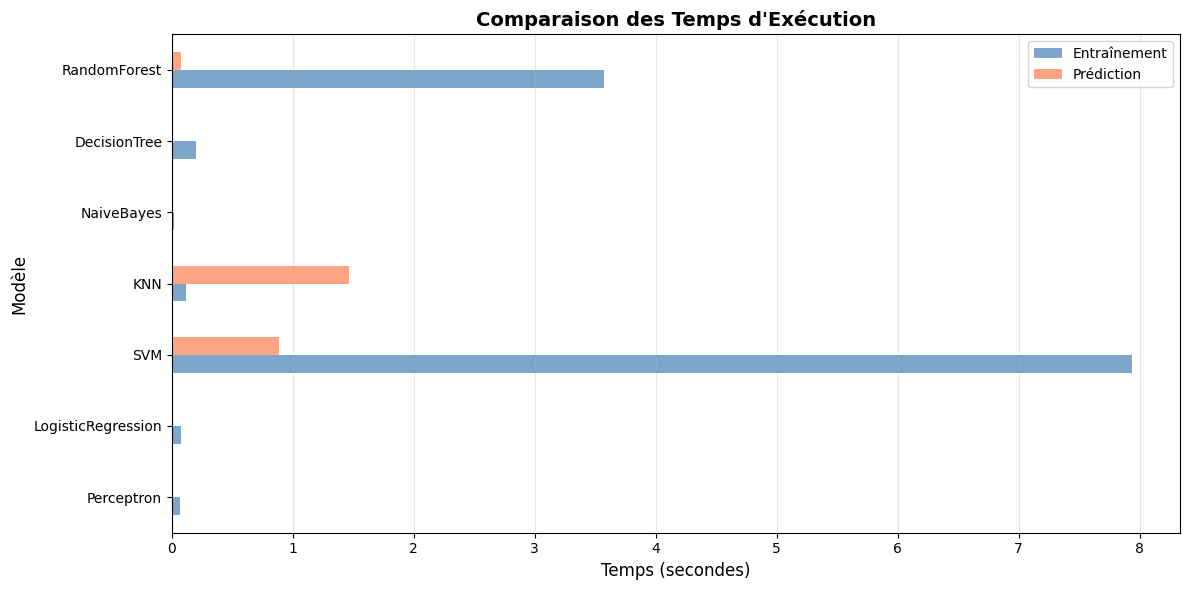

In [ ]:
import time
import pandas as pd

training_times = []
prediction_times = []
model_names = []

for name, model in models.items():
    # Mesure du temps d'entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times.append(training_time)

    # Mesure du temps de prédiction
    start_time = time.time()
    model.predict(X_test)
    prediction_time = time.time() - start_time
    prediction_times.append(prediction_time)
    
    model_names.append(name)

# Création du DataFrame
time_df = pd.DataFrame({
    'Model': model_names,
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})

# Affichage
print("\n" + "="*70)
print("TEMPS D'ENTRAÎNEMENT ET DE PRÉDICTION")
print("="*70)
print(time_df.to_string(index=False))
print("="*70)

# Visualisation
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1: Temps d'entraînement
ax1.barh(time_df['Model'], time_df['Training Time (s)'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Temps (secondes)', fontsize=12)
ax1.set_title('Temps d\'Entraînement par Modèle', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Graphique 2: Temps de prédiction
ax2.barh(time_df['Model'], time_df['Prediction Time (s)'], color='coral', alpha=0.7)
ax2.set_xlabel('Temps (secondes)', fontsize=12)
ax2.set_title('Temps de Prédiction par Modèle', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Graphique comparatif
time_df.set_index('Model')[['Training Time (s)', 'Prediction Time (s)']].plot(
    kind='barh',
    figsize=(12, 6),
    color=['steelblue', 'coral'],
    alpha=0.7
)
plt.xlabel('Temps (secondes)', fontsize=12)
plt.ylabel('Modèle', fontsize=12)
plt.title('Comparaison des Temps d\'Exécution', fontsize=14, fontweight='bold')
plt.legend(['Entraînement', 'Prédiction'], loc='best')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Interpretation of results
### 1. Performance analysis
The performance of the different models is compared using classification metrics and ROC curves. Logistic regression and SVM show robust performance, while KNN and Naive Bayes show greater variation depending on the data.

**Question:**

What observations can you make about the performance of the different models from the results obtained?

### 2. Discussion of the results
The logistic regression model showed good generalization ability, with a good balance between precision and recall.
The SVM model also performed well, with a high AUC, indicating a good ability to discriminate between classes.
The Perceptron's performance was slightly lower, but it remains a good choice for fast and simple implementation.
KNN and Naive Bayes can be improved by adjusting their respective hyperparameters.

**Question:**

What adjustments can you suggest to improve the KNN and Naive Bayes models?

## Conclusion
### 1. Summary of work carried out
We have developed and validated several classification models to predict whether a property will be sold within 6 months. The results show that logistic regression and SVM are the best-performing models.

**Question:**

What would be your final recommendation for model choice and why?

### 2. Prospects for improvement
To further improve model performance, we can explore the use of feature selection techniques, hyperparameter optimization and ensemble models.

**Question:**

What other techniques or models could you explore to further improve performance?

### 3. Future work
Future work could include implementing ensemble models such as Random Forest or Gradient Boosting, as well as exploring deep learning techniques for real estate classification.

**Question:**

How do you think ensemble models or deep learning could improve the performance of your classification system?
